# Predicting breast cancer using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a  machine learning model capable of predicting whether or not someone has breast cancer based on their medical attributes. 




## Preparing the tools

We are going to use pandas, matplotlib, numpy for data analysis and manipulation

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Breast-data.csv to Breast-data.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For plot to appear inside the notebook
%matplotlib inline

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


#Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve


## LOAD DATA

In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Breast-data.csv']))
# Dataset is now stored in a Pandas Dataframe
df.shape #(rows, columns)

(698, 11)

# Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you working with.

1. What question(s) are you trying to solve ? 
2. What kind of data do we have and how do we treat different types ? 
3. What's missing from the data and how to deal with it ?
4. Where are the outliers and why should we care about them ? [In statistics, an outlier is a data point that differs significantly from other observations] 
5. How can you add, change or remove features to get more out of your data ? 

In [8]:
df.head()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


In [9]:
df.tail()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
693,776715,3,1,1,1,3,2,1,1,1,0
694,841769,2,1,1,1,2,1,1,1,1,0
695,888820,5,10,10,3,7,3,8,10,2,1
696,897471,4,8,6,4,3,4,10,6,1,1
697,897471,4,8,8,5,4,5,10,4,1,1


In [10]:
## Finding out how many of each class are there 

df["Class"].value_counts()

0    457
1    241
Name: Class, dtype: int64

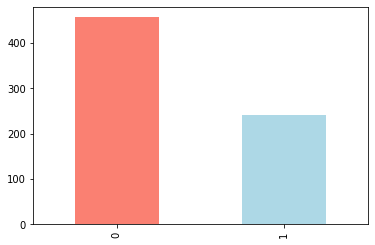

In [11]:
df["Class"].value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Sample Code Number          698 non-null    int64
 1   Clump Thickness             698 non-null    int64
 2   Uniformility of cell size   698 non-null    int64
 3   Uniformility of cell shape  698 non-null    int64
 4   Marginal Adhesion           698 non-null    int64
 5   Single Epithelial Cell      698 non-null    int64
 6   Bare Nuclei                 698 non-null    int64
 7   Bland chromation            698 non-null    int64
 8   Normal Nucleoli             698 non-null    int64
 9   Mitoses                     698 non-null    int64
 10  Class                       698 non-null    int64
dtypes: int64(11)
memory usage: 60.1 KB


In [13]:
## Are there any missing values ? isna() or 'isnull()' function is used to detect missing values.

df.isna().sum() 

Sample Code Number            0
Clump Thickness               0
Uniformility of cell size     0
Uniformility of cell shape    0
Marginal Adhesion             0
Single Epithelial Cell        0
Bare Nuclei                   0
Bland chromation              0
Normal Nucleoli               0
Mitoses                       0
Class                         0
dtype: int64

In [14]:
df.describe()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.510029,3.438395,2.869628,1.590258,0.345272
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,3.614579,2.440056,3.055004,1.716162,0.475798
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## Breast Cancer Frequency according to Clump Thickness

In [15]:
df.head(8)

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1
5,1018099,1,1,1,1,2,10,3,1,1,0
6,1018561,2,1,2,1,2,1,3,1,1,0
7,1033078,2,1,1,1,2,1,1,1,5,0


In [16]:
df["Clump Thickness"].value_counts()

1     145
5     129
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump Thickness, dtype: int64

In [17]:
## Compare Class column with Clump Thickness 

pd.crosstab(df.Class, df["Clump Thickness"])

Clump Thickness,1,2,3,4,5,6,7,8,9,10
Class,,,,,,,,,,
0,142,46,96,66,83,16,2,5,0,1
1,3,4,12,14,46,18,21,41,14,68


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

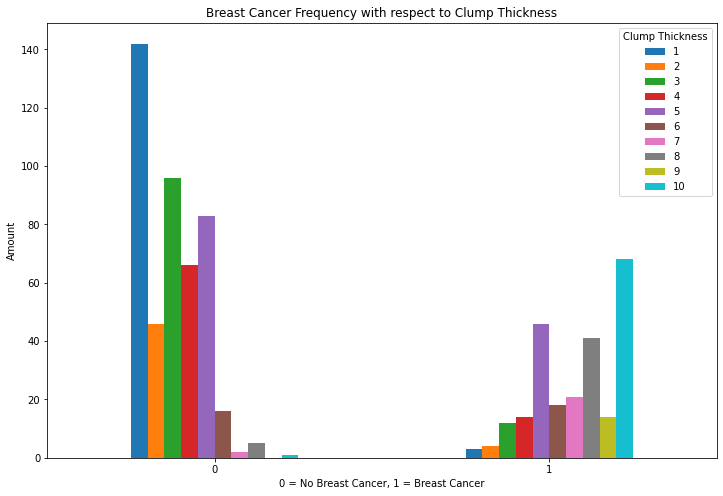

In [18]:
## Create a plot of crosstab

pd.crosstab(df["Class"], df["Clump Thickness"]).plot(kind="bar",
                                                     figsize=(12,8))

plt.title("Breast Cancer Frequency with respect to Clump Thickness")
plt.xlabel("0 = No Breast Cancer, 1 = Breast Cancer")
plt.ylabel("Amount")
plt.xticks(rotation=0)

In [19]:
## CREATING ANOTHER FIGURE 

In [20]:
df.head()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


In [21]:
df["Uniformility of cell shape"].value_counts()

1     352
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: Uniformility of cell shape, dtype: int64

In [22]:
df["Marginal Adhesion"].value_counts()

1     406
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal Adhesion, dtype: int64

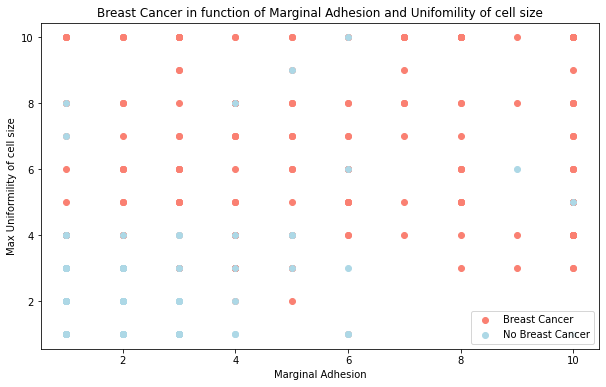

In [23]:
# Create another figure

plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(df["Marginal Adhesion"][df["Class"]==1],
            df["Uniformility of cell size"][df["Class"]==1],
            color=["salmon"])

# Scatter with negative example 
plt.scatter(df["Marginal Adhesion"][df["Class"]==0],
            df["Uniformility of cell size"][df["Class"]==0],
            color=["lightblue"]) 

plt.title("Breast Cancer in function of Marginal Adhesion and Unifomility of cell size")
plt.xlabel("Marginal Adhesion")
plt.ylabel("Max Uniformility of cell size")
plt.legend(["Breast Cancer","No Breast Cancer"])


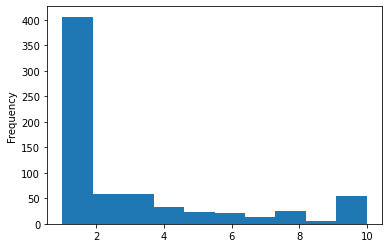

In [24]:
## Checking the distribution of Marginal Adhesion with the histogram

df["Marginal Adhesion"].plot.hist()

In [25]:
df["Normal Nucleoli"].value_counts()

1     442
10     61
3      44
2      36
8      24
6      22
5      19
4      18
9      16
7      16
Name: Normal Nucleoli, dtype: int64

In [26]:
df["Mitoses"].value_counts()

1     578
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

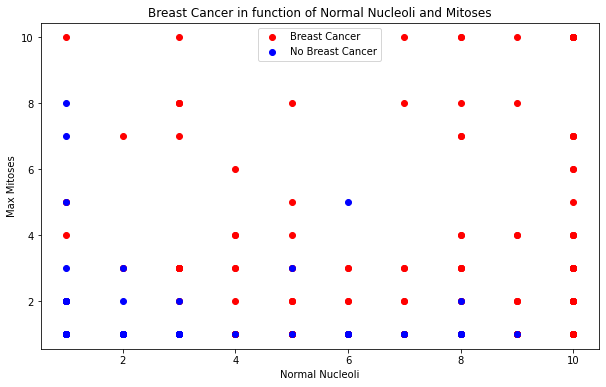

In [27]:
## findind pattern between Normal Nucleoli and Mitoses.


plt.figure(figsize=(10,6))

##Scatter with postive 
plt.scatter(df["Normal Nucleoli"][df["Class"]==1],
            df["Mitoses"][df["Class"]==1],
            color=["red"])

##Scatter with negative
plt.scatter(df["Normal Nucleoli"][df["Class"]==0],
            df["Mitoses"][df["Class"]==0],
            color=["blue"])

plt.title("Breast Cancer in function of Normal Nucleoli and Mitoses")
plt.xlabel("Normal Nucleoli")
plt.ylabel("Max Mitoses")
plt.legend(["Breast Cancer","No Breast Cancer"])


In [28]:
df.head()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


In [29]:
## Make correlation matrix 

df.corr()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
Sample Code Number,1.000000,-0.055276,-0.041735,-0.041717,-0.065003,-0.045630,-0.095440,-0.060082,-0.052188,-0.034961,-0.065038
Clump Thickness,-0.055276,1.000000,0.645366,0.655089,0.486699,0.522108,0.588496,0.558511,0.536176,0.350176,0.703666
Uniformility of cell size,-0.041735,0.645366,1.000000,0.906814,0.705397,0.751674,0.686563,0.755824,0.722699,0.458548,0.795052
Uniformility of cell shape,-0.041717,0.655089,0.906814,1.000000,0.682871,0.719524,0.707773,0.736066,0.719272,0.438756,0.787350
Marginal Adhesion,-0.065003,0.486699,0.705397,0.682871,1.000000,0.599402,0.665965,0.666759,0.603132,0.417476,0.681827
Single Epithelial Cell,-0.045630,0.522108,0.751674,0.719524,0.599402,1.000000,0.582017,0.616108,0.628704,0.478975,0.663563
Bare Nuclei,-0.095440,0.588496,0.686563,0.707773,0.665965,0.582017,1.000000,0.674422,0.575108,0.341118,0.785082
Bland chromation,-0.060082,0.558511,0.755824,0.736066,0.666759,0.616108,0.674422,1.000000,0.665914,0.344118,0.728309
Normal Nucleoli,-0.052188,0.536176,0.722699,0.719272,0.603132,0.628704,0.575108,0.665914,1.000000,0.428185,0.699236
Mitoses,-0.034961,0.350176,0.458548,0.438756,0.417476,0.478975,0.341118,0.344118,0.428185,1.000000,0.412466


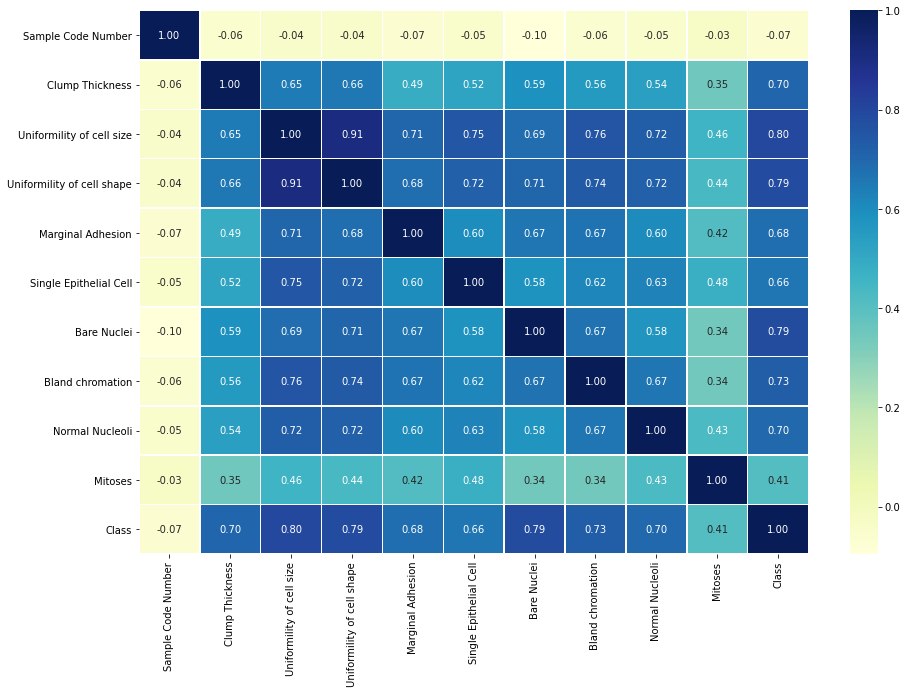

In [30]:
## making correlation matrix more understable 

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax =  sns.heatmap(corr_matrix,
                  annot=True,
                  linewidth=0.5,
                  fmt=".2f",
                  cmap="YlGnBu",);

In [31]:
df["Mitoses"].value_counts()

1     578
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

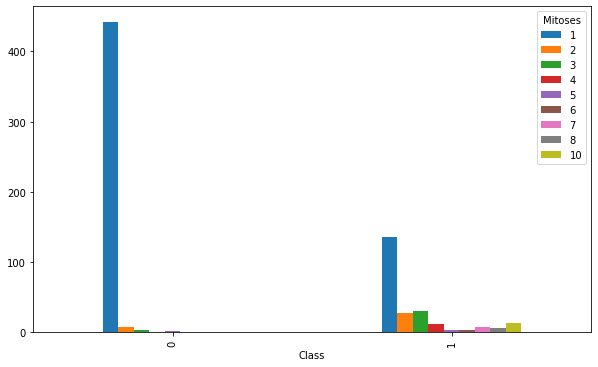

In [32]:
pd.crosstab(df["Class"],df["Mitoses"]).plot(kind="bar",
                                            figsize=(10,6))

## MODELLING

In [33]:
df.head()

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


In [34]:
# Split the data into X and y
X = df.drop("Class", axis=1)  ## axis = 0 (for index) and axis=1 (for column)
y = df["Class"]

In [35]:
X

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses
0,1002945,5,4,4,5,7,10,3,2,1
1,1015425,3,1,1,1,2,2,3,1,1
2,1016277,6,8,8,1,3,4,3,7,1
3,1017023,4,1,1,3,2,1,3,1,1
4,1017122,8,10,10,8,7,10,9,7,1
...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1
694,841769,2,1,1,1,2,1,1,1,1
695,888820,5,10,10,3,7,3,8,10,2
696,897471,4,8,6,4,3,4,10,6,1


In [36]:
y

0      0
1      0
2      0
3      0
4      1
      ..
693    0
694    0
695    1
696    1
697    1
Name: Class, Length: 698, dtype: int64

In [37]:
# Split data into train and  test sets
np.random.seed(42)

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [38]:
X_train

,Sample Code Number,Clump Thickness,Uniformility of cell size,Uniformility of cell shape,Marginal Adhesion,Single Epithelial Cell,Bare Nuclei,Bland chromation,Normal Nucleoli,Mitoses
82,1147044,3,1,1,1,2,2,7,1,1
51,1110102,10,3,6,2,3,5,4,10,2
220,1225799,10,6,4,3,10,10,9,10,1
559,1321942,5,1,1,1,2,1,3,1,1
544,1197527,5,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...
71,1124651,1,3,3,2,2,1,7,2,1
106,1170420,1,6,8,10,8,10,5,7,1
270,411453,5,1,1,1,2,1,3,1,1
435,1295186,10,10,10,1,6,1,2,8,1


In [39]:
y_train

82     0
51     1
220    1
559    0
544    0
      ..
71     0
106    1
270    1
435    1
102    1
Name: Class, Length: 558, dtype: int64


Now we have got our data split into training and test sets, it's time to build a machine learning model.

We will train it(find a patterns) on the training sets. 

And we will test it(using the patterns) on the test sets.

We are going to try 4 different machine learning models:
1. Logistice Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. Naive Bayes


In [40]:
# Put models into dictionary 

models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier(),
          "Naive Bayes":GaussianNB()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test): 
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data(with no labels)
    X_test: testing data(with no labels)
    y_train: training labels
    y_test: testing labels
    """
    
    #set random seed
    np.random.seed(42)

    # Making a dictionary to keep model scoresS
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        #Evaluate the model and  append  it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [41]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

In [42]:
model_scores

{'KNN': 0.65,
 'Logistic Regression': 0.6428571428571429,
 'Naive Bayes': 0.8714285714285714,
 'Random Forest': 0.9571428571428572}

## Model Comparison

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

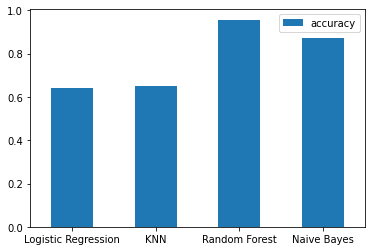

In [43]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

plt.xticks(rotation=0)


Now we've got a baseline model...  and we know a model's first prediction aren't always what we should based our next steps off. What should we do ?

Let's look at the following:
1. Hyperparameter tuning  # part of all machine learning models
2. Features importance    # part with all
3. Confusion Matrix       #from 3 to 10 concerned with Classification model 
4. Cross-Validation
5. Precision 
6. Recall
7. F1 score
8. Classification report 
9. ROC curve 
10. Area under the curve (AUC) 

## Hyperparameter Tuning(manually)

In [44]:
#Let's tune KNN

train_scores = []
test_scores = []

# Creates a list of different values for n_neighbors
neighbors = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(X_train, y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))
    

In [45]:
train_scores

[1.0,
 0.8100358422939068,
 0.7849462365591398,
 0.7365591397849462,
 0.7311827956989247,
 0.7078853046594982,
 0.7060931899641577,
 0.7060931899641577,
 0.7096774193548387,
 0.7060931899641577,
 0.6935483870967742,
 0.6917562724014337,
 0.6935483870967742,
 0.6953405017921147,
 0.6971326164874552,
 0.7060931899641577,
 0.7025089605734767,
 0.6953405017921147,
 0.6935483870967742,
 0.6917562724014337]

In [46]:
test_scores

[0.6285714285714286,
 0.6571428571428571,
 0.6285714285714286,
 0.6714285714285714,
 0.65,
 0.6428571428571429,
 0.5928571428571429,
 0.6357142857142857,
 0.6071428571428571,
 0.6214285714285714,
 0.6571428571428571,
 0.6571428571428571,
 0.6357142857142857,
 0.6428571428571429,
 0.6357142857142857,
 0.6357142857142857,
 0.6285714285714286,
 0.6285714285714286,
 0.6285714285714286,
 0.6285714285714286]

Maximum KNN score on the test data: 67.14%


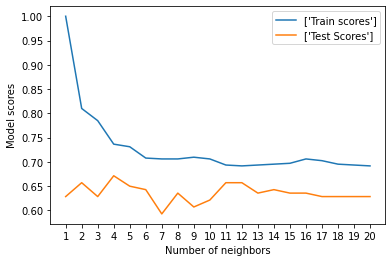

In [47]:
plt.plot(neighbors, train_scores, label=["Train scores"])
plt.plot(neighbors, test_scores, label=["Test Scores"])

plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model scores")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV (CV= Cross Validated)

We will be tuning 

    1. LogisticeRegression()
    2. RandomForestClassifier()
    3. GaussianNB() 
   using RandomizedSearchCV

In [48]:
# Create hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":['liblinear']}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,80,8),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,10,2),
           "min_samples_leaf":np.arange(1,10,2)}

# Create hyperparameter grid for Naive Bayes
param_NB = {"var_smoothing":np.logspace(0,-9,100)}

Now we have got hyperparameter grids setup for each of our models,let's tune them using RandomizedSearchCV.

In [49]:
# Tune LogisticRegression 

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#Fit random hyperparameter search model for LogisticRegression 
rs_log_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [50]:
# Find the best parameters
rs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [51]:
# Evaluate the randomized search LogisticRegression Model
rs_log_reg.score(X_test, y_test)

0.6428571428571429

Now we've tuned LogisticeRegression(), let's do the same for RandomForestClassifier(). 

In [52]:
# Tuning RandomForestClassifier

# Setup random seed
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=3,
                           n_iter=20,
                           verbose=True)

#Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    3.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [53]:
#Find the best hyperparameters
rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 26}

In [54]:
#Evaluate the randomized search RandomForestClassifier
rs_rf.score(X_test,y_test)

0.95

Tuning the last model Naive Bayes

In [55]:
#Tuning Naive Bayes

#Setup the random seed
np.random.seed(42)

#Setup the random hyperparameter search for NaiveBayed
rs_nb = RandomizedSearchCV(GaussianNB(),
                           param_distributions=param_NB,
                           cv=5,
                           n_iter=100,
                           verbose=True)

#Fit random hyperparameter search model for NaiveBayes
rs_nb.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=True)

In [56]:
#Finding the best hyperparameters
rs_nb.best_params_

{'var_smoothing': 1e-09}

In [57]:
#Evaluate the randomized search for Naive Bayes
rs_nb.score(X_test,y_test)

0.8714285714285714

In [58]:
model_scores

{'KNN': 0.65,
 'Logistic Regression': 0.6428571428571429,
 'Naive Bayes': 0.8714285714285714,
 'Random Forest': 0.9571428571428572}

# Hyperparameter Tuning with GridSearchCV

Since our Random Forest model provides the best score so far, we'll try and improve them again using GridSearchCV

In [59]:
#Different hyperparameter for our RandomForestClassifier model
rf_grid = {"n_estimators":np.arange(10,80,8),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,10,2),
           "min_samples_leaf":np.arange(1,10,2)}

#Setup grid hyperparameter search for RandomForestClassifier

np.random.seed(42)

gs_rf = GridSearchCV(RandomForestClassifier(),
                           param_grid=rf_grid,
                           cv=2,
                           verbose=True,
                           n_jobs=4)
#Fit grid hyperparameter search model for RandomForestClassifer
gs_rf.fit(X_train, y_train)

Fitting 2 folds for each of 720 candidates, totalling 1440 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   30.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   51.9s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 1440 out of 1440 | elapsed:  1.5min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [60]:
#Find the best hyperparameter for RandomForestClassifier
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'n_estimators': 10}

In [61]:
#Evaluate the Grid Search RandomForestClassifier
gs_rf.score(X_test,y_test)

0.9428571428571428

# Evaluating our tuned machine learning classifier, beyond accuracy

  * ROC curve and AUC curve
  * confusion matrix
  * classification report
  * Precision
  * Recall
  * F1-score 
    
    and it would be great if cross-validation is used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [62]:
# Make predictions with tuned models
y_predicts = gs_rf.predict(X_test)

In [63]:
y_predicts

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1])

In [64]:
y_test

158    1
499    0
396    0
155    0
321    0
      ..
24     1
218    0
431    0
281    1
110    1
Name: Class, Length: 140, dtype: int64

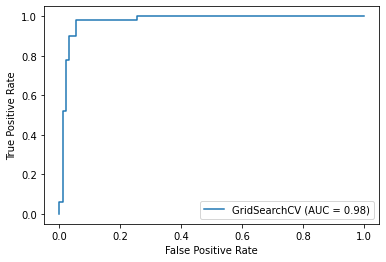

In [65]:
# Plot ROC curve and calculate the AUC(area under curve) metric
plot_roc_curve(gs_rf, X_test, y_test)

In [66]:
#Confusion Matrix
print(confusion_matrix(y_test, y_predicts))

[[85  5]
 [ 3 47]]


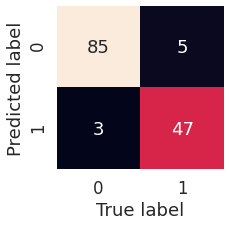

In [67]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_predicts):
  """
  Plot a confusion matrix using Seaborn's heatmap()
  """
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test,y_predicts),
                  annot=True,
                   cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_predicts)

We have ROC, an AUC metric and a confusion matrix. Now let's get a classification report as well as cross-validated precision, recall and f1-score.

In [68]:
print(classification_report(y_test, y_predicts))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        90
           1       0.90      0.94      0.92        50

    accuracy                           0.94       140
   macro avg       0.93      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140

